In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
# get data file names
path =r'./data/airbnb/'
filenames = glob.glob(path + "/listings_*.csv")
print(filenames)

['./data/airbnb/listings_09-02-2021.csv', './data/airbnb/listings_12-01-2021.csv', './data/airbnb/listings_04-01-2017.csv', './data/airbnb/listings_16-04-2020.csv', './data/airbnb/listings_08-04-2017.csv', './data/airbnb/listings_17-07-2015.csv', './data/airbnb/listings_10-01-2020.csv', './data/airbnb/listings_07-10-2017.csv', './data/airbnb/listings_12-04-2018.csv', './data/airbnb/listings_12-10-2020.csv', './data/airbnb/listings_30-04-2015.csv', './data/airbnb/listings_10-04-2019.csv', './data/airbnb/listings_06-07-2017.csv', './data/airbnb/listings_17-07-2020.csv', './data/airbnb/listings_10-10-2018.csv', './data/airbnb/listings_10-07-2019.csv', './data/airbnb/listings_10-07-2018.csv', './data/airbnb/listings_03-01-2016.csv', './data/airbnb/listings_14-01-2019.csv', './data/airbnb/listings_17-01-2018.csv', './data/airbnb/listings_02-10-2015.csv', './data/airbnb/listings_16-10-2019.csv', './data/airbnb/listings_07-11-2016.csv']


In [3]:
# read all the *.csv inside airbnb/, and add a column with the date
airbnb_dfs = []
for file in filenames:
    # read every dataset
    df_per_date = pd.read_csv(file)
    airbnb_dfs.append(df_per_date)
    
    # find the date the file was scraped
    tokens = file.split('/')
    name = tokens[len(tokens)-1]
    name = name.split('.')[0]
    date = name.split('_')[1]
    
    # add a new column with the scraped date
    df_per_date['date_scraped'] = date
    
    print(date)
    print(f'Size of {file}: {df_per_date.shape}')
    print(f'Columns of {file}: {df_per_date.columns.to_list()}\n')

09-02-2021
Size of ./data/airbnb/listings_09-02-2021.csv: (18471, 17)
Columns of ./data/airbnb/listings_09-02-2021.csv: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'date_scraped']

12-01-2021
Size of ./data/airbnb/listings_12-01-2021.csv: (18569, 17)
Columns of ./data/airbnb/listings_12-01-2021.csv: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'date_scraped']

04-01-2017
Size of ./data/airbnb/listings_04-01-2017.csv: (17412, 17)
Columns of ./data/airbnb/listings_04-01-2017.csv: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'long

In [4]:
# make a super-dataframe with all the dates
airbnb_df = pd.concat(airbnb_dfs, axis=0, ignore_index=True)
print(airbnb_df.shape)
airbnb_df.head()

(413680, 17)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date_scraped
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,116,1,21,2019-11-01,0.22,19,80.0,09-02-2021
1,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37973,2.17631,Private room,80,3,2,2017-11-06,0.04,3,69.0,09-02-2021
2,23197,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,200,3,52,2019-12-15,0.43,2,326.0,09-02-2021
3,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,79,2,63,2020-02-22,0.54,5,0.0,09-02-2021
4,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37916,2.17535,Private room,40,30,8,2013-07-15,0.06,3,40.0,09-02-2021


In [5]:
# convert the dates to a datetime format
airbnb_df['date_scraped'] = pd.to_datetime(airbnb_df['date_scraped'], format='%d-%m-%Y')

In [6]:
airbnb_df['date_scraped']

0        2021-02-09
1        2021-02-09
2        2021-02-09
3        2021-02-09
4        2021-02-09
            ...    
413675   2016-11-07
413676   2016-11-07
413677   2016-11-07
413678   2016-11-07
413679   2016-11-07
Name: date_scraped, Length: 413680, dtype: datetime64[ns]

In [7]:
# airbnb_df.to_csv('./data/cleaned/airbnb/airbnb_detailed.csv', index=False)

In [8]:
# change the dates to the same dates as the rent dataset
airbnb_df['period'] = pd.PeriodIndex(airbnb_df['date_scraped'], freq='Q').to_timestamp()
airbnb_df['period']

0        2021-01-01
1        2021-01-01
2        2021-01-01
3        2021-01-01
4        2021-01-01
            ...    
413675   2016-10-01
413676   2016-10-01
413677   2016-10-01
413678   2016-10-01
413679   2016-10-01
Name: period, Length: 413680, dtype: datetime64[ns]

### I'm going to aggregate by neighborhood and date (mean for price, count for number of listings, proportion of mega-hosts, proportion of entire home vs. room, mean availability)

In [9]:
groupby_object = airbnb_df.groupby(by=['neighbourhood', 'period'])

In [10]:
# mean price for neighbourhood and period
simple_airbnb_df = groupby_object.mean()['price'].reset_index().rename(columns={'price':'airbnb_price(€)'})
simple_airbnb_df

,neighbourhood,period,airbnb_price(€)
0,Baró de Viver,2015-07-01,75.000000
1,Baró de Viver,2016-01-01,27.000000
2,Baró de Viver,2017-01-01,90.000000
3,Baró de Viver,2017-04-01,94.750000
4,Baró de Viver,2017-07-01,90.000000
...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471
1568,les Tres Torres,2020-04-01,208.971429
1569,les Tres Torres,2020-07-01,108.628571
1570,les Tres Torres,2020-10-01,110.421053


In [11]:
# count of listings for neighbourhood and period
count_listings = groupby_object.count()['id'].reset_index().rename(columns={'id':'n_airbnb_listings'})
count_listings

,neighbourhood,period,n_airbnb_listings
0,Baró de Viver,2015-07-01,1
1,Baró de Viver,2016-01-01,1
2,Baró de Viver,2017-01-01,1
3,Baró de Viver,2017-04-01,4
4,Baró de Viver,2017-07-01,1
...,...,...,...
1567,les Tres Torres,2020-01-01,34
1568,les Tres Torres,2020-04-01,35
1569,les Tres Torres,2020-07-01,35
1570,les Tres Torres,2020-10-01,38


In [12]:
# merge with the simple dataframe
simple_airbnb_df = simple_airbnb_df.merge(count_listings, on=['neighbourhood', 'period'])
simple_airbnb_df

,neighbourhood,period,airbnb_price(€),n_airbnb_listings
0,Baró de Viver,2015-07-01,75.000000,1
1,Baró de Viver,2016-01-01,27.000000,1
2,Baró de Viver,2017-01-01,90.000000,1
3,Baró de Viver,2017-04-01,94.750000,4
4,Baró de Viver,2017-07-01,90.000000,1
...,...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471,34
1568,les Tres Torres,2020-04-01,208.971429,35
1569,les Tres Torres,2020-07-01,108.628571,35
1570,les Tres Torres,2020-10-01,110.421053,38


In [13]:
# mean availability for neighbourhood and period
mean_availability = groupby_object.mean()['availability_365'].reset_index().rename(columns={'airbnb_365':'airbnb_availability'})
mean_availability

,neighbourhood,period,availability_365
0,Baró de Viver,2015-07-01,358.000000
1,Baró de Viver,2016-01-01,365.000000
2,Baró de Viver,2017-01-01,2.000000
3,Baró de Viver,2017-04-01,128.250000
4,Baró de Viver,2017-07-01,4.000000
...,...,...,...
1567,les Tres Torres,2020-01-01,224.911765
1568,les Tres Torres,2020-04-01,179.200000
1569,les Tres Torres,2020-07-01,231.342857
1570,les Tres Torres,2020-10-01,206.526316


In [14]:
# merge with the simple dataframe
simple_airbnb_df = simple_airbnb_df.merge(mean_availability, on=['neighbourhood', 'period'])
simple_airbnb_df

,neighbourhood,period,airbnb_price(€),n_airbnb_listings,availability_365
0,Baró de Viver,2015-07-01,75.000000,1,358.000000
1,Baró de Viver,2016-01-01,27.000000,1,365.000000
2,Baró de Viver,2017-01-01,90.000000,1,2.000000
3,Baró de Viver,2017-04-01,94.750000,4,128.250000
4,Baró de Viver,2017-07-01,90.000000,1,4.000000
...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471,34,224.911765
1568,les Tres Torres,2020-04-01,208.971429,35,179.200000
1569,les Tres Torres,2020-07-01,108.628571,35,231.342857
1570,les Tres Torres,2020-10-01,110.421053,38,206.526316


In [15]:
# let's see how many business and particulars are posting on airbnb, per neighbourhood
room_type_value_counts = groupby_object['room_type'].value_counts().reset_index(name='count')
room_type_value_counts

,neighbourhood,period,room_type,count
0,Baró de Viver,2015-07-01,Entire home/apt,1
1,Baró de Viver,2016-01-01,Private room,1
2,Baró de Viver,2017-01-01,Entire home/apt,1
3,Baró de Viver,2017-04-01,Private room,3
4,Baró de Viver,2017-04-01,Entire home/apt,1
...,...,...,...,...
4032,les Tres Torres,2020-10-01,Private room,15
4033,les Tres Torres,2020-10-01,Shared room,1
4034,les Tres Torres,2021-01-01,Entire home/apt,43
4035,les Tres Torres,2021-01-01,Private room,20


In [16]:
room_type_value_counts = pd.pivot_table(room_type_value_counts, 
                                   values='count', 
                                   columns=['room_type'], index=['neighbourhood', 'period'], fill_value=0)
room_type_value_counts

room_type                   Entire home/apt  Hotel room  Private room  \
neighbourhood   period                                                  
Baró de Viver   2015-07-01                1           0             0   
                2016-01-01                0           0             1   
                2017-01-01                1           0             0   
                2017-04-01                1           0             3   
                2017-07-01                1           0             0   
...                                     ...         ...           ...   
les Tres Torres 2020-01-01               19           0            14   
                2020-04-01               20           0            14   
                2020-07-01               19           0            15   
                2020-10-01               22           0            15   
                2021-01-01               43           0            20   

room_type                   Shared room  
neighbourhood   period                   
Baró de Viver   2015-07-01            0  
                2016-01-01            0  
                2017-01-01            0  
                2017-04-01            0  
                2017-07-01            0  
...                                 ...  
les Tres Torres 2020-01-01            1  
                2020-04-01            1  
                2020-07-01            1  
                2020-10-01            1  
                2021-01-01            2  

[1572 rows x 4 columns]

In [17]:
room_type_value_counts = room_type_value_counts.reset_index(drop=False)
room_type_value_counts

room_type,neighbourhood,period,Entire home/apt,Hotel room,Private room,Shared room
0,Baró de Viver,2015-07-01,1,0,0,0
1,Baró de Viver,2016-01-01,0,0,1,0
2,Baró de Viver,2017-01-01,1,0,0,0
3,Baró de Viver,2017-04-01,1,0,3,0
4,Baró de Viver,2017-07-01,1,0,0,0
...,...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,19,0,14,1
1568,les Tres Torres,2020-04-01,20,0,14,1
1569,les Tres Torres,2020-07-01,19,0,15,1
1570,les Tres Torres,2020-10-01,22,0,15,1


In [18]:
# let's assume entire homes are more probably runned by business
def ratio_business_particular(row):
    business = row['Entire home/apt'] + row['Hotel room']
    particular = row['Private room'] + row['Shared room']
    return (business /(business + particular))

ratio_business_particular(room_type_value_counts.iloc[1520])

0.4977578475336323

In [19]:
room_type_value_counts = room_type_value_counts.assign(airbnb_ratio_business=lambda r: ratio_business_particular(r))
room_type_value_counts

room_type,neighbourhood,period,Entire home/apt,Hotel room,Private room,Shared room,airbnb_ratio_business
0,Baró de Viver,2015-07-01,1,0,0,0,1.000000
1,Baró de Viver,2016-01-01,0,0,1,0,0.000000
2,Baró de Viver,2017-01-01,1,0,0,0,1.000000
3,Baró de Viver,2017-04-01,1,0,3,0,0.250000
4,Baró de Viver,2017-07-01,1,0,0,0,1.000000
...,...,...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,19,0,14,1,0.558824
1568,les Tres Torres,2020-04-01,20,0,14,1,0.571429
1569,les Tres Torres,2020-07-01,19,0,15,1,0.542857
1570,les Tres Torres,2020-10-01,22,0,15,1,0.578947


In [20]:
# merge with the simple dataframe
simple_airbnb_df = simple_airbnb_df.merge(room_type_value_counts.drop(columns=['Entire home/apt','Hotel room','Private room','Shared room']), on=['neighbourhood', 'period'])
simple_airbnb_df

,neighbourhood,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business
0,Baró de Viver,2015-07-01,75.000000,1,358.000000,1.000000
1,Baró de Viver,2016-01-01,27.000000,1,365.000000,0.000000
2,Baró de Viver,2017-01-01,90.000000,1,2.000000,1.000000
3,Baró de Viver,2017-04-01,94.750000,4,128.250000,0.250000
4,Baró de Viver,2017-07-01,90.000000,1,4.000000,1.000000
...,...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471,34,224.911765,0.558824
1568,les Tres Torres,2020-04-01,208.971429,35,179.200000,0.571429
1569,les Tres Torres,2020-07-01,108.628571,35,231.342857,0.542857
1570,les Tres Torres,2020-10-01,110.421053,38,206.526316,0.578947


In [21]:
# what can we consider a super-host?
airbnb_df['calculated_host_listings_count'].describe()

count    413680.000000
mean         10.994169
std          24.957500
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max         196.000000
Name: calculated_host_listings_count, dtype: float64

<AxesSubplot:>

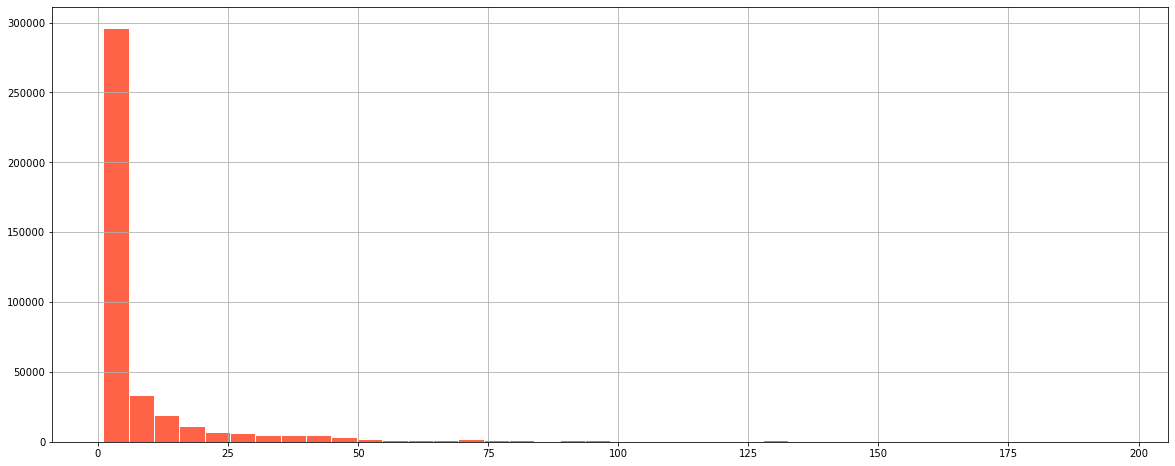

In [22]:
airbnb_df['calculated_host_listings_count'].hist(bins=40, color='tomato', edgecolor='white', figsize=(20,8))
#plt.yscale('log')

In [23]:
# what is an outlier in this distribution?
interquantile_range = airbnb_df['calculated_host_listings_count'].quantile(.75) - airbnb_df['calculated_host_listings_count'].quantile(.25)
airbnb_df['calculated_host_listings_count'].quantile(.75) + 1.5*interquantile_range

16.0

Even though the outliers are above 16, a quick research on airbnb forums shows that someone with more than 10 listings is already hiring people to manage them. So I'm going to put the threshold there

In [24]:
def ratio_professional_particular(sr, threshold):
    profess_hosts = sr[sr > threshold].count()
    non_profess_hosts = sr[sr <= threshold].count()
    
    return (profess_hosts / (profess_hosts + non_profess_hosts)) if (profess_hosts + non_profess_hosts) != 0 else 0

In [25]:
ratio_professional_hosts = groupby_object['calculated_host_listings_count'].agg(func=ratio_professional_particular, threshold=10).reset_index().rename(columns={'calculated_host_listings_count':'airbnb_professional_ratio'})
ratio_professional_hosts

,neighbourhood,period,airbnb_professional_ratio
0,Baró de Viver,2015-07-01,0.000000
1,Baró de Viver,2016-01-01,0.000000
2,Baró de Viver,2017-01-01,0.000000
3,Baró de Viver,2017-04-01,0.000000
4,Baró de Viver,2017-07-01,0.000000
...,...,...,...
1567,les Tres Torres,2020-01-01,0.500000
1568,les Tres Torres,2020-04-01,0.428571
1569,les Tres Torres,2020-07-01,0.457143
1570,les Tres Torres,2020-10-01,0.421053


In [26]:
# merge with the simple dataframe
simple_airbnb_df = simple_airbnb_df.merge(ratio_professional_hosts, on=['neighbourhood', 'period'])
simple_airbnb_df

,neighbourhood,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio
0,Baró de Viver,2015-07-01,75.000000,1,358.000000,1.000000,0.000000
1,Baró de Viver,2016-01-01,27.000000,1,365.000000,0.000000,0.000000
2,Baró de Viver,2017-01-01,90.000000,1,2.000000,1.000000,0.000000
3,Baró de Viver,2017-04-01,94.750000,4,128.250000,0.250000,0.000000
4,Baró de Viver,2017-07-01,90.000000,1,4.000000,1.000000,0.000000
...,...,...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471,34,224.911765,0.558824,0.500000
1568,les Tres Torres,2020-04-01,208.971429,35,179.200000,0.571429,0.428571
1569,les Tres Torres,2020-07-01,108.628571,35,231.342857,0.542857,0.457143
1570,les Tres Torres,2020-10-01,110.421053,38,206.526316,0.578947,0.421053


Should we consider a host with more than 50 listings a mega-host?

In [27]:
ratio_mega_hosts = groupby_object['calculated_host_listings_count'].agg(func=ratio_professional_particular, threshold=50).reset_index().rename(columns={'calculated_host_listings_count':'airbnb_mega_host_ratio'})
ratio_mega_hosts

,neighbourhood,period,airbnb_mega_host_ratio
0,Baró de Viver,2015-07-01,0.000000
1,Baró de Viver,2016-01-01,0.000000
2,Baró de Viver,2017-01-01,0.000000
3,Baró de Viver,2017-04-01,0.000000
4,Baró de Viver,2017-07-01,0.000000
...,...,...,...
1567,les Tres Torres,2020-01-01,0.176471
1568,les Tres Torres,2020-04-01,0.142857
1569,les Tres Torres,2020-07-01,0.142857
1570,les Tres Torres,2020-10-01,0.131579


In [28]:
# merge with the simple dataframe
simple_airbnb_df = simple_airbnb_df.merge(ratio_mega_hosts, on=['neighbourhood', 'period'])
simple_airbnb_df

,neighbourhood,period,airbnb_price(€),n_airbnb_listings,availability_365,airbnb_ratio_business,airbnb_professional_ratio,airbnb_mega_host_ratio
0,Baró de Viver,2015-07-01,75.000000,1,358.000000,1.000000,0.000000,0.000000
1,Baró de Viver,2016-01-01,27.000000,1,365.000000,0.000000,0.000000,0.000000
2,Baró de Viver,2017-01-01,90.000000,1,2.000000,1.000000,0.000000,0.000000
3,Baró de Viver,2017-04-01,94.750000,4,128.250000,0.250000,0.000000,0.000000
4,Baró de Viver,2017-07-01,90.000000,1,4.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1567,les Tres Torres,2020-01-01,153.176471,34,224.911765,0.558824,0.500000,0.176471
1568,les Tres Torres,2020-04-01,208.971429,35,179.200000,0.571429,0.428571,0.142857
1569,les Tres Torres,2020-07-01,108.628571,35,231.342857,0.542857,0.457143,0.142857
1570,les Tres Torres,2020-10-01,110.421053,38,206.526316,0.578947,0.421053,0.131579


In [29]:
# simple_airbnb_df.to_csv('./data/cleaned/airbnb/airbnb_simple.csv', index=False)